#### Building Unigram LM Tokenizer from scratch

Sample Word: lowest
Unigram Tokens: ['lowest']
Vocabulary Size: 38


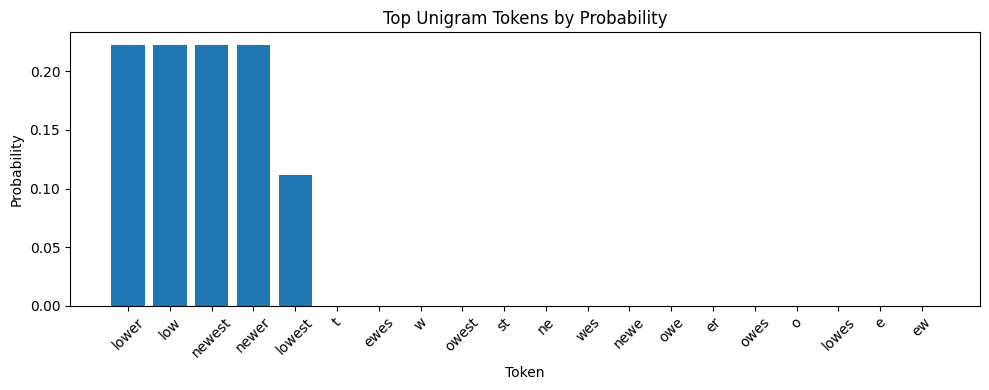

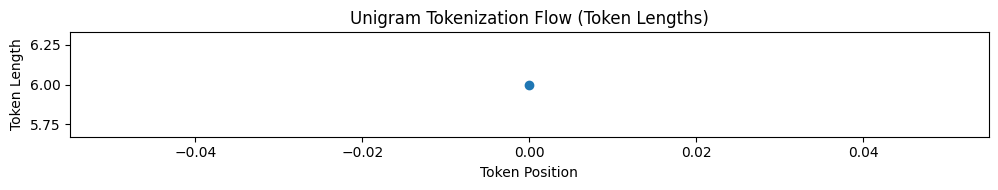

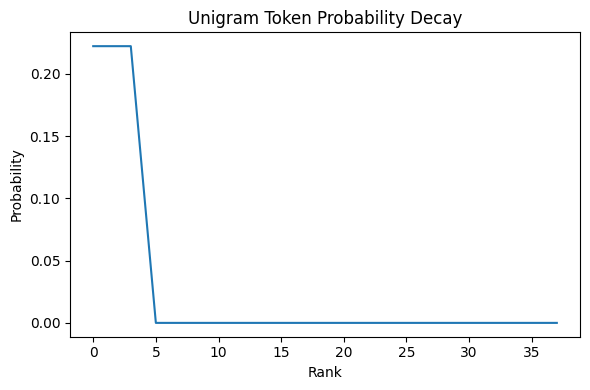

In [ ]:
from collections import Counter
import math
import random
import matplotlib.pyplot as plt

corpus = [
    "low lower lowest",
    "newer newer newest",
    "low newest lower"
]

def build_initial_vocab(corpus):
    vocab = set()
    word_freq = Counter()

    for sentence in corpus:
        for word in sentence.split():
            word_freq[word] += 1
            for i in range(len(word)):
                for j in range(i + 1, len(word) + 1):
                    vocab.add(word[i:j])

    return list(vocab), word_freq
vocab, word_freq = build_initial_vocab(corpus)

def initialize_probs(vocab):
    probs = {}
    uniform_prob = 1 / len(vocab)
    for token in vocab:
        probs[token] = uniform_prob
    return probs
token_probs = initialize_probs(vocab)

def unigram_tokenize(word, token_probs):
    n = len(word)
    dp = [(-math.inf, []) for _ in range(n + 1)]
    dp[0] = (0, [])

    for i in range(n):
        if dp[i][0] == -math.inf:
            continue
        for token, prob in token_probs.items():
            if word.startswith(token, i):
                j = i + len(token)
                score = dp[i][0] + math.log(prob)
                if score > dp[j][0]:
                    dp[j] = (score, dp[i][1] + [token])

    return dp[n][1]

def train_unigram(word_freq, token_probs, iters=5):
    for _ in range(iters):
        counts = Counter()

        for word, freq in word_freq.items():
            tokens = unigram_tokenize(word, token_probs)
            for t in tokens:
                counts[t] += freq

        total = sum(counts.values())
        for token in token_probs:
            token_probs[token] = counts[token] / total if token in counts else 1e-8

    return token_probs
token_probs = train_unigram(word_freq, token_probs)

sample_word = "lowest"
tokens = unigram_tokenize(sample_word, token_probs)

print("Sample Word:", sample_word)
print("Unigram Tokens:", tokens)
print("Vocabulary Size:", len(token_probs))

top_tokens = sorted(token_probs.items(), key=lambda x: x[1], reverse=True)[:20]

labels = [t[0] for t in top_tokens]
values = [t[1] for t in top_tokens]

plt.figure(figsize=(10, 4))
plt.bar(labels, values)
plt.title("Top Unigram Tokens by Probability")
plt.xlabel("Token")
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

token_lengths = [len(t) for t in tokens]

plt.figure(figsize=(10, 2))
plt.plot(range(len(tokens)), token_lengths, marker="o")
plt.title("Unigram Tokenization Flow (Token Lengths)")
plt.xlabel("Token Position")
plt.ylabel("Token Length")
plt.tight_layout()
plt.show()

sorted_probs = sorted(token_probs.values(), reverse=True)

plt.figure(figsize=(6, 4))
plt.plot(sorted_probs)
plt.title("Unigram Token Probability Decay")
plt.xlabel("Rank")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()
